In [1]:
from demo_model import SGG_Model
import cv2
import os

import matplotlib.pyplot as plt

config_path = "../checkpoints/PSG/SGDET/COMPARISON/react-yolov8m/config.yml"
weights_path = "../checkpoints/PSG/SGDET/COMPARISON/react-yolov8m/best_model_epoch_9.pth"

source = "test_custom/example.jpg"

if '.jpg' in source:
    example_img = source

    img = cv2.imread(example_img)

    model = SGG_Model(config_path, weights_path, rel_conf=0.35, box_conf=0.1, show_fps=False)

    clean_img, graph = model.predict(img, visu=True)

elif os.path.isdir(source):
    os.makedirs(source + '/results', exist_ok=True)
    model = SGG_Model(config_path, weights_path, rel_conf=0.1, box_conf=0.2, show_fps=False)

    for file in os.listdir(source):
        example_img = source + '/' + file

        if '.jpg' not in example_img:
            continue

        img = cv2.imread(example_img)

        clean_img, graph = model.predict(img, visu=True)

        # to rgb
        clean_img = cv2.cvtColor(clean_img, cv2.COLOR_BGR2RGB)
        # save to dir
        cv2.imwrite(source + '/results/res_' + file, clean_img)

/home/maelic/miniconda3/envs/sgg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-03 13:42:13.086937: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 13:42:13.095363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733200933.106258   83521 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733200933.109473   83521 cuda_blas.cc:141

2024-12-03 13:42:16.997 | INFO     | sgg_benchmark.utils.logger:setup_logger:31 - Using loguru logger with level: INFO
Overriding model.yaml nc=80 with nc=133
loading word vectors from /home/maelic/glove/glove.6B.200d.pt
loading word vectors from /home/maelic/glove/glove.6B.200d.pt
Objects detected:  11
Relationships detected:  10


/home/maelic/Documents/PhD/MyModel/SGG-Benchmark/demo/demo_model.py:443: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  subj_indices = torch.searchsorted(unique_values, filtered_rels[:, 0])


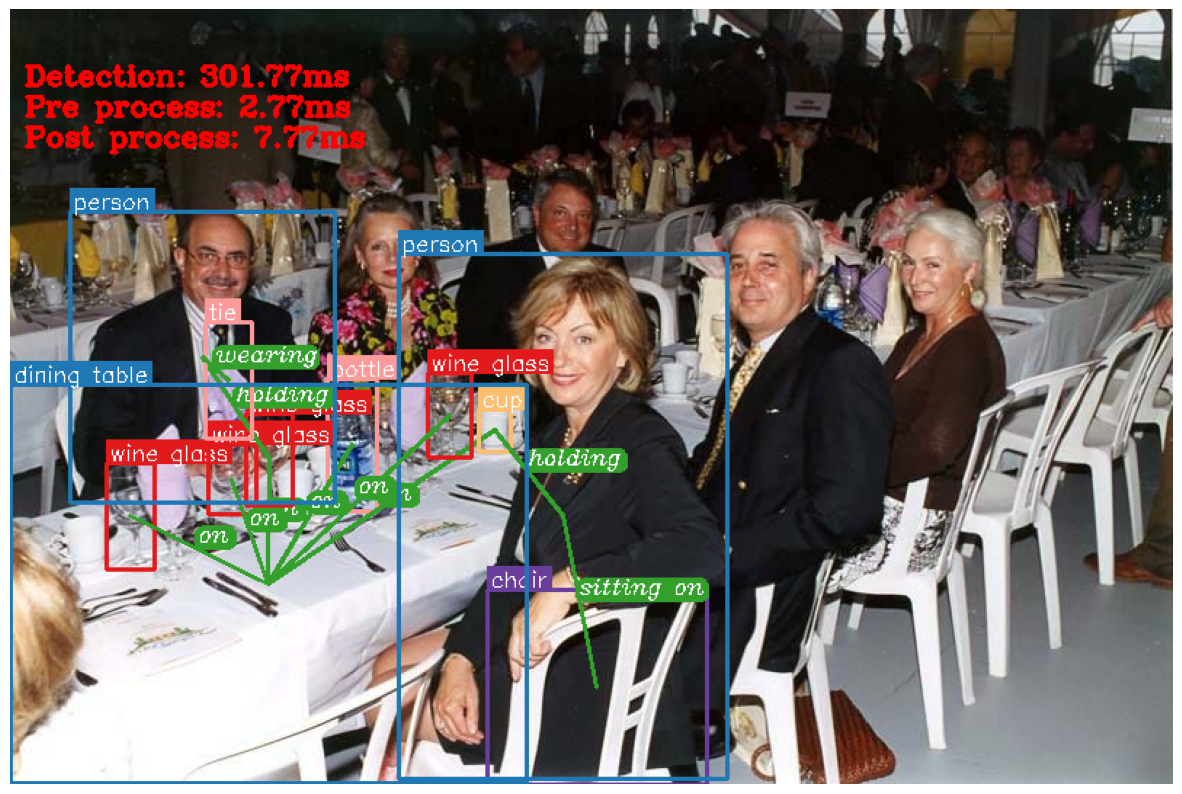

In [2]:
plt.figure(figsize=(15, 15))  # You can adjust the size as needed
plt.imshow(clean_img)
plt.axis('off')
plt.show()